In [281]:
import numpy as np
import random
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import torch
import seaborn as sns
import torch.nn as nn
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
#imputationby regression
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))


[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [282]:
train_data = pd.read_csv('C:/Users/Public/Documents/titanic/train.csv')
train_data2= pd.read_csv('C:/Users/Public/Documents/titanic/train.csv')



In [283]:
x=np.stack([train_data['Age'],train_data['Fare']],1)
imp.fit(x)
y=np.round(imp.transform(x))
ag=y[:,0]
fr=y[:,1]

In [58]:
imp.fit(x)
print(np.round(imp.transform(x)))
y=np.round(imp.transform(x))

array([22., 38., 26., 35., 35., 29., 54.,  2., 27., 14.,  4., 58., 20.,
       39., 14., 55.,  2., 29., 31., 29., 35., 34., 15., 28.,  8., 38.,
       29., 19., 29., 29., 40., 32., 29., 66., 28., 42., 29., 21., 18.,
       14., 40., 27., 29.,  3., 19., 29., 29., 29., 29., 18.,  7., 21.,
       49., 29., 65., 30., 21., 28.,  5., 11., 22., 38., 45.,  4., 30.,
       29., 29., 19., 17., 26., 32., 16., 21., 26., 32., 25., 29., 29.,
        1., 30., 22., 29., 29., 28., 17., 33., 16., 29., 23., 24., 29.,
       20., 46., 26., 59., 29., 71., 23., 34., 34., 28., 29., 21., 33.,
       37., 28., 21., 29., 38., 29., 47., 14., 22., 20., 17., 21., 70.,
       29., 24.,  2., 21., 29., 32., 32., 54., 12., 29., 24., 29., 45.,
       33., 20., 47., 29., 25., 23., 19., 37., 16., 24., 29., 22., 24.,
       19., 18., 19., 27.,  9., 36., 42., 51., 22., 56., 40., 29., 51.,
       16., 30., 29., 30., 44., 40., 26., 17.,  1.,  9., 30., 45., 30.,
       28., 61.,  4.,  1., 21., 56., 18., 29., 50., 30., 36., 30

In [131]:
train_data2['Age']= ag

In [133]:
(train_data2['Age']==40).value_counts()

False    876
True      15
Name: Age, dtype: int64

In [148]:
td=train_data.dropna()

In [149]:
t1=td['Age'].values
t2=train_data2['Age'].values

In [150]:


stat, p = ttest_ind(t1, t2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=5.533, p=0.000
Probably different distributions


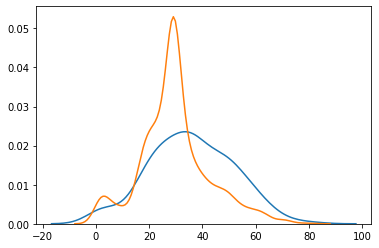

In [163]:
sns.distplot(t1, hist=False)
sns.distplot(t2, hist=False)

In [166]:
real_data=pd.read_csv('C:/Users/Public/Documents/titanic/test.csv')

In [174]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [213]:

data= pd.concat([train_data, real_data])
mean_t=data['Age'].mean()
mean_t

29.881137667304014

In [214]:
std_t=train_data['Age'].std()

In [215]:
s = np.random.normal(mean_t, std_t, 891)

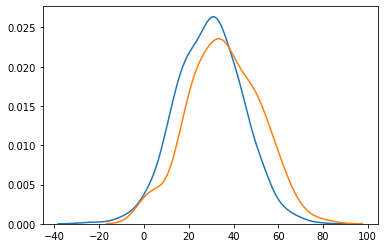

In [216]:
sns.distplot(s, hist=False)
sns.distplot(t1, hist=False)

In [245]:
datas['Age'].values

array([38.  , 35.  , 54.  ,  4.  , 58.  , 34.  , 28.  , 19.  , 49.  ,
       65.  , 45.  , 29.  , 25.  , 23.  , 46.  , 71.  , 23.  , 21.  ,
       47.  , 24.  , 32.5 , 54.  , 19.  , 37.  , 24.  , 36.5 , 22.  ,
       61.  , 56.  , 50.  ,  1.  ,  3.  , 44.  , 58.  ,  2.  , 40.  ,
       31.  , 32.  , 38.  , 35.  , 44.  , 37.  , 29.  , 62.  , 30.  ,
       52.  , 40.  , 58.  , 35.  , 37.  , 63.  , 19.  , 36.  ,  2.  ,
       50.  ,  0.92, 17.  , 30.  , 24.  , 18.  , 31.  , 40.  , 36.  ,
       36.  , 16.  , 45.5 , 38.  , 29.  , 41.  , 45.  ,  2.  , 24.  ,
       24.  , 22.  , 60.  , 24.  , 25.  , 27.  , 36.  , 23.  , 24.  ,
       33.  , 32.  , 28.  , 50.  , 14.  , 64.  ,  4.  , 52.  , 30.  ,
       49.  , 65.  , 48.  , 47.  , 23.  , 25.  , 35.  , 58.  , 55.  ,
       54.  , 25.  , 16.  , 18.  , 36.  , 47.  , 34.  , 30.  , 44.  ,
       45.  , 22.  , 36.  , 50.  , 17.  , 48.  , 39.  , 53.  , 36.  ,
       39.  , 39.  , 36.  , 18.  , 60.  , 52.  , 49.  , 40.  ,  4.  ,
       42.  , 61.  ,

In [256]:


    rand = [random.choice(datas['Age'].values) for x in range(1000)]
    rand2= [random.choice(rand) for x in range(600)]
rand
datas['Age'].values

array([38.  , 35.  , 54.  ,  4.  , 58.  , 34.  , 28.  , 19.  , 49.  ,
       65.  , 45.  , 29.  , 25.  , 23.  , 46.  , 71.  , 23.  , 21.  ,
       47.  , 24.  , 32.5 , 54.  , 19.  , 37.  , 24.  , 36.5 , 22.  ,
       61.  , 56.  , 50.  ,  1.  ,  3.  , 44.  , 58.  ,  2.  , 40.  ,
       31.  , 32.  , 38.  , 35.  , 44.  , 37.  , 29.  , 62.  , 30.  ,
       52.  , 40.  , 58.  , 35.  , 37.  , 63.  , 19.  , 36.  ,  2.  ,
       50.  ,  0.92, 17.  , 30.  , 24.  , 18.  , 31.  , 40.  , 36.  ,
       36.  , 16.  , 45.5 , 38.  , 29.  , 41.  , 45.  ,  2.  , 24.  ,
       24.  , 22.  , 60.  , 24.  , 25.  , 27.  , 36.  , 23.  , 24.  ,
       33.  , 32.  , 28.  , 50.  , 14.  , 64.  ,  4.  , 52.  , 30.  ,
       49.  , 65.  , 48.  , 47.  , 23.  , 25.  , 35.  , 58.  , 55.  ,
       54.  , 25.  , 16.  , 18.  , 36.  , 47.  , 34.  , 30.  , 44.  ,
       45.  , 22.  , 36.  , 50.  , 17.  , 48.  , 39.  , 53.  , 36.  ,
       39.  , 39.  , 36.  , 18.  , 60.  , 52.  , 49.  , 40.  ,  4.  ,
       42.  , 61.  ,

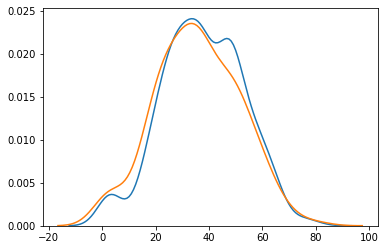

In [253]:
sns.distplot(rand2, hist=False)
sns.distplot(t1, hist=False)

In [275]:
df=train_data['Cabin'].dropna()
df = df.astype('category')
cabin=df.cat.codes.values

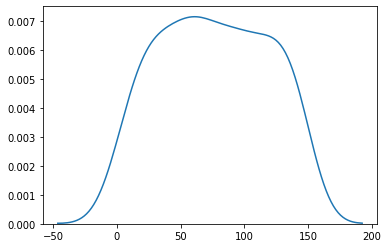

In [276]:
sns.distplot(cabin, hist=False)


In [278]:

nulc=train_data['Cabin'].isnull().sum()
fillc=[random.choice(cabin) for x in range(nulc)]
train_data.loc[train_data.Cabin.isnull(), 'Cabin'] = fillc